# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split

/home/jwow/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [2]:
auto_numeric = pd.read_csv("datasets/train_auto_numeric.csv")

display(auto_numeric.info())
display(auto_numeric.head(8))
display(auto_numeric.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
normalized-losses          159 non-null float64
wheel-base                 159 non-null float64
length                     159 non-null float64
width                      159 non-null float64
height                     159 non-null float64
engine-size                159 non-null float64
bore                       159 non-null float64
stroke                     159 non-null float64
compression-ratio          159 non-null float64
engine-power               159 non-null float64
peak-rpm                   159 non-null float64
city-mpg                   159 non-null float64
highway-mpg                159 non-null float64
mean-effective-pressure    159 non-null float64
torque                     159 non-null float64
price                      159 non-null float64
dtypes: float64(16)
memory usage: 20.0 KB


None

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


- 159 entries (cars)
- 16 attributes - all float64 non-null
- mem usage: 20 KB

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the (pairwise) distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

highway-mpg               -0.438467
city-mpg                  -0.356790
mean-effective-pressure   -0.104860
peak-rpm                  -0.099345
normalized-losses          0.015368
torque                     0.101435
compression-ratio          0.125683
stroke                     0.127834
height                     0.139563
bore                       0.365207
wheel-base                 0.423511
engine-power               0.443969
length                     0.512883
width                      0.524326
engine-size                0.715125
price                      1.000000
Name: price, dtype: float64

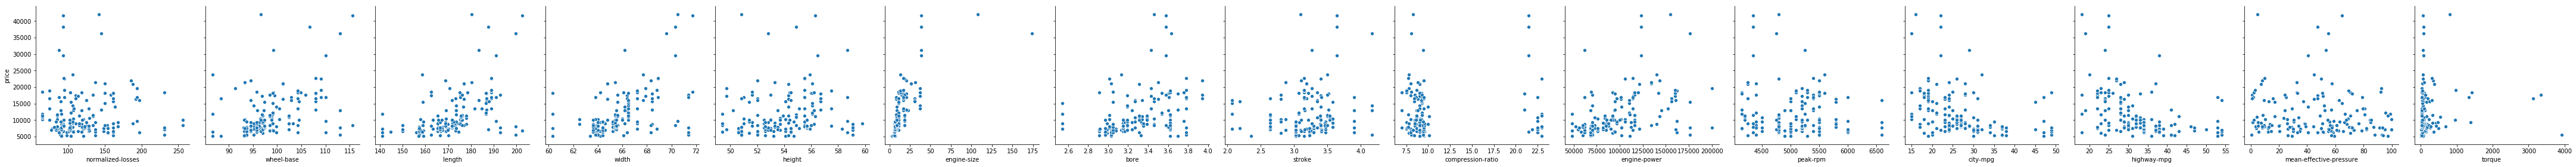

In [3]:
corr_coeff = auto_numeric.corr()["price"]   # calculate correlation coefficient
display(corr_coeff.sort_values())

# fig, ax = plt.subplots(figsize=(13,7))   
# ax.grid(linestyle='--')                 # gridlines
# ax.set_yscale('log')                    # use log scale due to single high value

# auto_sorted = auto_numeric.sort_values("price") # sort values based on price to yield continuous distribution

# for attr in auto_sorted.columns:
#     if attr != "price":
#         # plot this attribute in ascending order
#         plt.plot(auto_sorted["price"], auto_sorted[attr])

# plt.ylabel("Correlation with 'price' (log scale)")
# plt.xlabel("price")
# ax.legend(loc="right", bbox_to_anchor=(1.25, 0.5))

cols = auto_numeric.columns

sns.pairplot(auto_numeric[cols], x_vars=cols.drop("price"), y_vars="price", height=4)
plt.show()

Useful attributes (in order of relevance):
1.  0.715125 - engine-size
1.  0.524326 - width
1.  0.512883 - length
1.  0.443969 - engine-power
1. -0.438467 - highway-mpg
1.  0.423511 - wheel-base                 


- from the correlation coefficient (the more _directly_ useful tool of the two), the attributes with the highest absolute correlation value are most closely related to price, whether that be positively, or negatively, meaning they either contribute to an increase or decrease in price with their own individual increases
- the plots are good to visualise the correlations but not to arrive at a definite correlation value

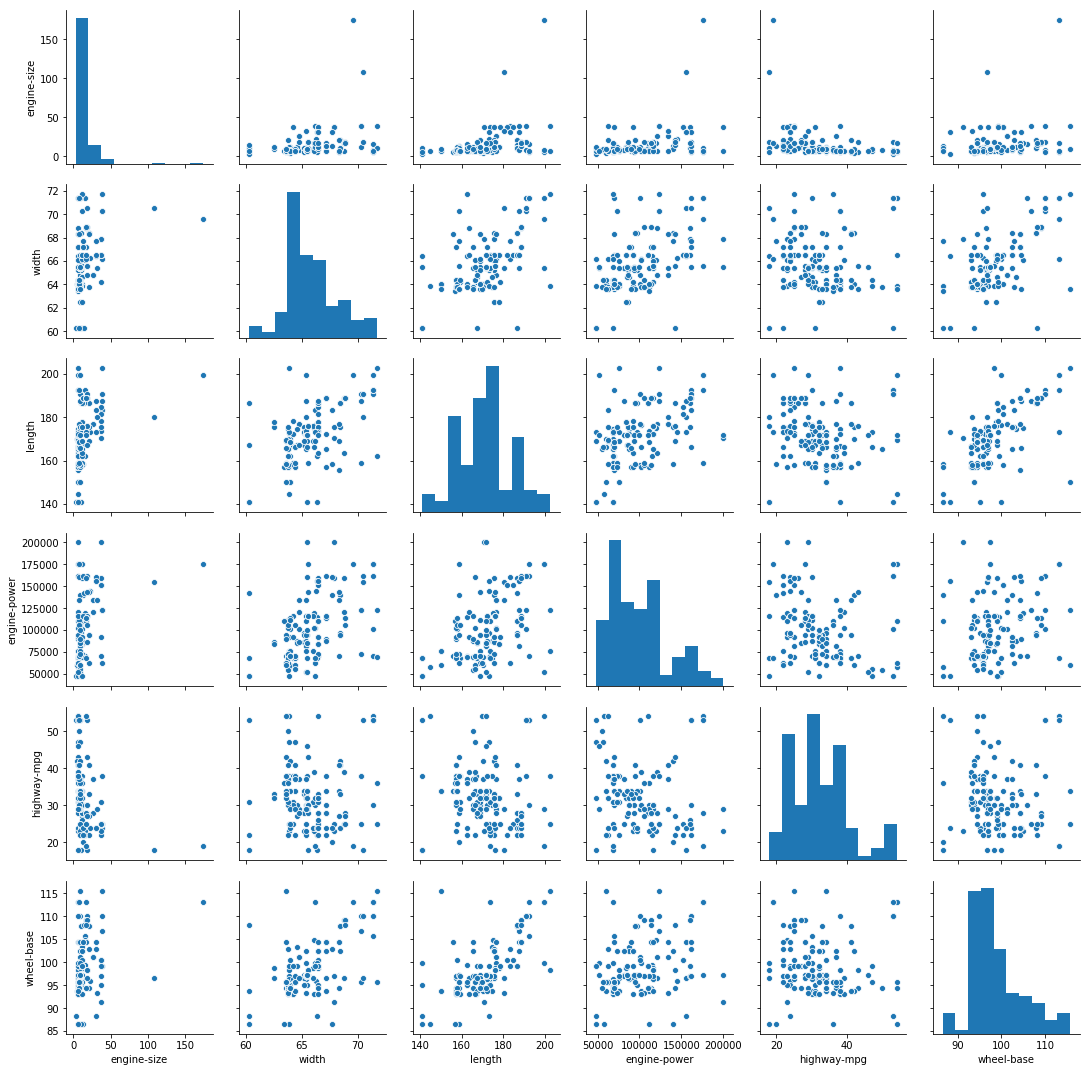

In [4]:
attrs_keep = ['engine-size', 'width', 'length', 'engine-power', 'highway-mpg', 'wheel-base']

# fig, ax = plt.subplots(figsize=(8,8))

# plot_cm(np.array(corr_coeff))

# attrs_keep = ["corr"] + attrs_keep
# ax.set_yticklabels(attrs_keep)
# ax.set_xticklabels(attrs_keep)

# plt.show()
sns.pairplot(auto_numeric[attrs_keep])
plt.show()

- wheel-base / width
- wheel-base / length

these have the most correlation and could likely be substitued by one another

- the most likely candidates for removal are the attributes which are least strongly correlated to price, since they yield the least amount of information to solving the problem or estimating the price
- in this dataset, the least useful attributes are:
 1. 0.015368 - normalized-losses
 1. -0.099345 - peak-rpm
 1. 0.101435 - torque
 1. -0.104860 - mean-effective-pressure
 
- removing these attributes would reduce dimensionality greatly, and with it reduce computation time
- it can easily be argued that any attribute with an absolute correlation value under 0.2 could likely be removed without much impact in the outcome of the price estimation

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

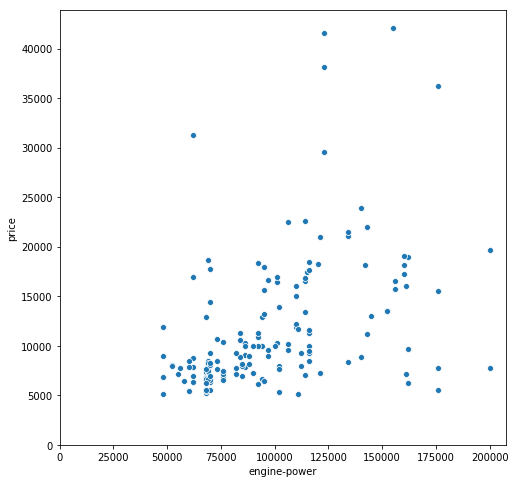

In [5]:
plt.figure(figsize=(8,8))
sns.scatterplot(auto_numeric["engine-power"], auto_numeric["price"])
plt.xlim(0), plt.ylim(0)
plt.show()

- variables appear to be somewhat positively correlated, so enginer-power _could_ be loosely used to predict price, with higher engine-power leading to higher price
- however, the correlation may not be linear and lead to incaccuracies

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

/home/jwow/miniconda3/envs/py3iaml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


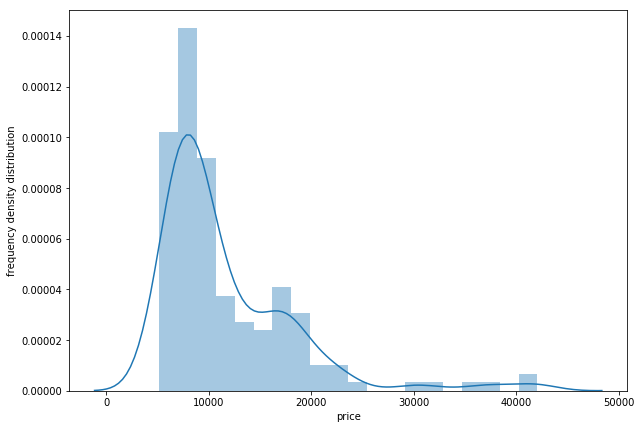

In [6]:
plt.figure(figsize=(10,7))
sns.distplot(auto_numeric["price"], bins=20)

plt.ylabel("frequency density distribution")

plt.show()


- the price variable may not be easy to model, again, because the correlation between it and the other variable may not be linear and lead to incaccuracies
- preprocessing may include applying a natural logarithm transformation to the data, or principal component analysis

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

In [7]:
engine_power_values = auto_numeric['engine-power'].values.reshape(-1, 1)
price_values        = auto_numeric['price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(engine_power_values, 
                                                    price_values, 
                                                    train_size=0.8, 
                                                    test_size=0.2, 
                                                    random_state=0)

### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

In [8]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor().fit(X_train, y_train)
print("dummy param : {:.2f}".format(dummy.predict(0).item()))

dummy param : 11853.27


<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters: ***N.B.*** *Here we mean the weights of the Regression  Function*.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

In [9]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)
print("linear regression coefficient={:.3f}, intercept={:.3f}".format(linreg.coef_.item(), linreg.intercept_.item()))

linear regression coefficient=0.090, intercept=2823.122


- when `engine-power` is $0$, `price` is predicted to be $2823.122$
- this means `engine-power` is can only predict prices above this value

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points (i.e. plot the independent variable along the X-axis and the price along the Y-axis). Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

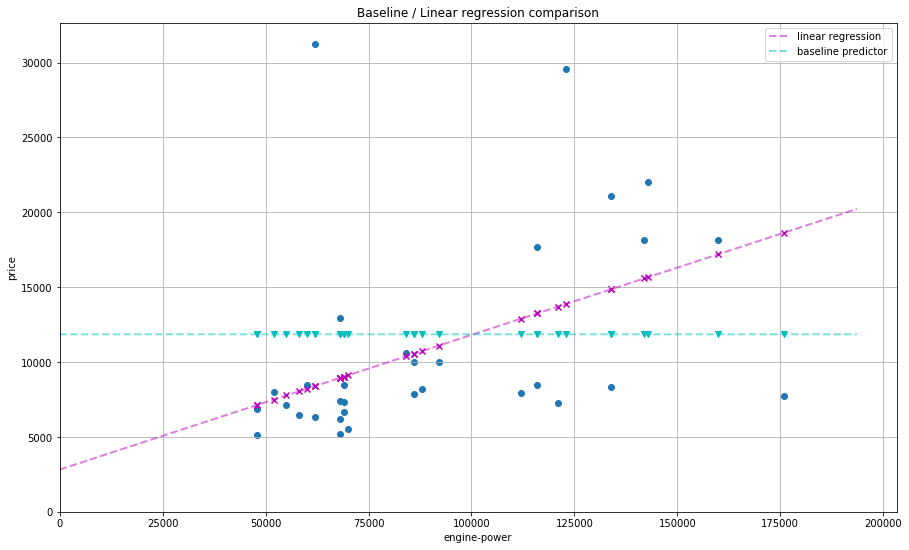

In [10]:
fig, ax = plt.subplots(figsize=(15,9))

x = np.arange(X_test.max() * 1.1).reshape(-1, 1)

# scatter test data
ax.scatter(X_test, y_test)

# plot linear regression line
ax.plot(x, linreg.predict(x), 
        color='m', alpha=0.5, linestyle='dashed', lw=2, label="linear regression")
# scatter linear regression prediction
ax.scatter(X_test, linreg.predict(X_test), 
           color='m', 
           marker='x')

# plot baseline predictor line
ax.plot(x, dummy.predict(x), 
        color='c', alpha=0.5, linestyle='dashed', lw=2, label="baseline predictor")
# scatter baseline predictor prediction
ax.scatter(X_test, dummy.predict(X_test), 
           color='c', 
           marker='v')

ax.set_xlabel('engine-power'), ax.set_ylabel('price')
plt.title("Baseline / Linear regression comparison")

plt.xlim(0)
plt.ylim(0)

plt.grid()
plt.legend()

plt.show()

- the regression line (orange) hits a lot of points more closely on the lower left part of the graph than the baseline predictor (green)
- the baseline also misses the general upward trend of the points and the regression line as it heads to the top right of the graph, making the regression line a better approach to the data

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

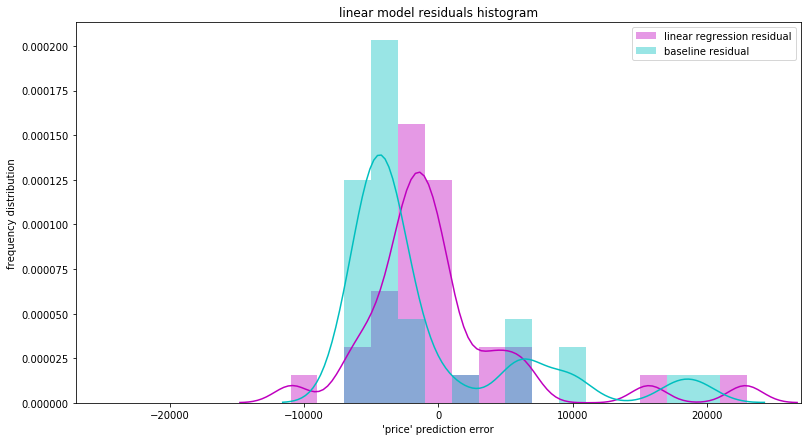

In [11]:
resid_linreg = y_test - linreg.predict(X_test)
resid_dummy = y_test - dummy.predict(X_test)
plt.figure(figsize=(13,7))
xlim = 27000
binwidth = 2000

sns.distplot(resid_linreg, 
             label="linear regression residual", 
             color='m',
             bins=np.arange(-xlim, xlim + binwidth, binwidth))
sns.distplot(resid_dummy, 
             label="baseline residual", 
             color='c',
             bins=np.arange(-xlim, xlim + binwidth, binwidth))

plt.title("linear model residuals histogram")
plt.xlabel("'price' prediction error"), plt.ylabel("frequency distribution")
plt.xlim(-xlim, xlim)

plt.legend()
plt.show()

In [12]:
from sklearn.metrics import r2_score, mean_squared_error

r2_linreg = r2_score(y_test, linreg.predict(X_test))
r2_dummy  = r2_score(y_test, dummy.predict(X_test))
print("coefficient of determination:")
print(" - linear regression : {:+.4f}".format(r2_linreg))
print(" - baseline          : {:+.4f}".format(r2_dummy))

rmse_linreg = np.sqrt(mean_squared_error(y_test, linreg.predict(X_test)))
rmse_dummy  = np.sqrt(mean_squared_error(y_test, dummy.predict(X_test)))
print("root mean squared error:")
print(" - linear regression : {:+.4f}".format(rmse_linreg))
print(" - baseline          : {:+.4f}".format(rmse_dummy))


coefficient of determination:
 - linear regression : +0.1685
 - baseline          : -0.0154
root mean squared error:
 - linear regression : +6153.7039
 - baseline          : +6800.3315


- linear model residuals histogram - this graph depicts the frequency with which a difference in price of size $x$ occurs in the predicted data
- coefficient of determination: an indication of how closely the predictions _match_ the ground truth
- root mean squared error: an indication of how _wrong_ the predictions are against the ground truth


- linear regression model:
 - distribution is closer to zero, therefore this model is less incorrect, the majority of the time
 - coefficient of determination: this model has a coefficient slightly greater than zero, indicating the model loosely has the ability to determine a value for price from the variable it's been given
 - root mean squared error: linear regression has a very high error value, not much higher than the baseline


- baseline model:
 - distribution is skewed to the negative side, thus more negative errors due to outliers
 - coefficient of determination: almost zero value means this model has little to no correlation to the actual ground truth
 - root mean squared error: baseline model also has a high error value, however is close to linear regression only because it heads exactly towards minimising this error with reduced complexity
 
 
- both models have admittedly bad statistics for this purpose, although linear regression is the better of the two:
 - linear regression not only marginally lowers error, it generally models the dependency between two variables well
 - baseline is good as a sanity check, yet is really just a "shotgun" approach by not modelling any dependency at all

<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



- since this hold-out set has not been shown to the model, the model will have had fewer points to observe
- the predictions are likely to be different depending on how the division is made

In [13]:
from sklearn.model_selection import KFold
k_fold = KFold(5, shuffle=True, random_state=0)
for train, test in k_fold.split(auto_numeric["engine-power"]):
    display(train, test)

array([  0,   1,   2,   3,   4,   5,   6,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  20,  21,  22,  23,  25,  27,  28,  29,  30,
        31,  32,  34,  35,  36,  38,  39,  41,  42,  43,  46,  47,  48,
        49,  50,  51,  52,  53,  55,  57,  58,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  84,  87,  88,  89,  91,  92,  93,  94,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113,
       114, 115, 116, 117, 118, 121, 122, 123, 124, 125, 127, 129, 130,
       132, 133, 135, 136, 137, 138, 139, 140, 141, 143, 145, 146, 147,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158])

array([  7,   8,  19,  24,  26,  33,  37,  40,  44,  45,  54,  56,  59,
        60,  61,  62,  63,  83,  85,  86,  90,  95, 110, 119, 120, 126,
       128, 131, 134, 142, 144, 148])

array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  11,  12,  13,  14,
        15,  17,  19,  20,  21,  23,  24,  25,  26,  28,  29,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  44,  45,  46,
        47,  48,  49,  50,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  67,  68,  69,  70,  72,  75,  76,  77,
        78,  79,  81,  82,  83,  84,  85,  86,  87,  88,  90,  91,  92,
        94,  95,  98,  99, 102, 103, 104, 105, 106, 110, 111, 112, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       144, 145, 147, 148, 149, 151, 152, 154, 155, 158])

array([  2,  10,  16,  18,  22,  27,  30,  43,  51,  66,  71,  73,  74,
        80,  89,  93,  96,  97, 100, 101, 107, 108, 109, 113, 130, 132,
       143, 146, 150, 153, 156, 157])

array([  0,   1,   2,   4,   5,   7,   8,   9,  10,  11,  14,  16,  17,
        18,  19,  21,  22,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  65,  66,  67,  70,  71,  72,  73,  74,  77,  79,  80,  81,
        82,  83,  85,  86,  87,  88,  89,  90,  91,  93,  95,  96,  97,
        99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 121, 123, 124, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 136, 137, 139, 140, 142, 143, 144, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157])

array([  3,   6,  12,  13,  15,  20,  23,  48,  49,  50,  52,  64,  68,
        69,  75,  76,  78,  84,  92,  94,  98, 106, 111, 112, 118, 122,
       125, 135, 138, 141, 145, 158])

array([  2,   3,   6,   7,   8,   9,  10,  12,  13,  15,  16,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  29,  30,  31,  32,  33,
        36,  37,  39,  40,  43,  44,  45,  47,  48,  49,  50,  51,  52,
        54,  56,  58,  59,  60,  61,  62,  63,  64,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 103, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 117, 118, 119, 120, 122, 125, 126, 127, 128, 130,
       131, 132, 133, 134, 135, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 148, 149, 150, 151, 153, 154, 156, 157, 158])

array([  0,   1,   4,   5,  11,  14,  17,  28,  34,  35,  38,  41,  42,
        46,  53,  55,  57,  65,  91, 102, 104, 105, 116, 121, 123, 124,
       129, 136, 137, 147, 152, 155])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  22,  23,  24,  26,  27,  28,
        30,  33,  34,  35,  37,  38,  40,  41,  42,  43,  44,  45,  46,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  59,  60,  61,
        62,  63,  64,  65,  66,  68,  69,  71,  73,  74,  75,  76,  78,
        80,  83,  84,  85,  86,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128,
       129, 130, 131, 132, 134, 135, 136, 137, 138, 141, 142, 143, 144,
       145, 146, 147, 148, 150, 152, 153, 155, 156, 157, 158])

array([  9,  21,  25,  29,  31,  32,  36,  39,  47,  58,  67,  70,  72,
        77,  79,  81,  82,  87,  88,  99, 103, 114, 115, 117, 127, 133,
       139, 140, 149, 151, 154])

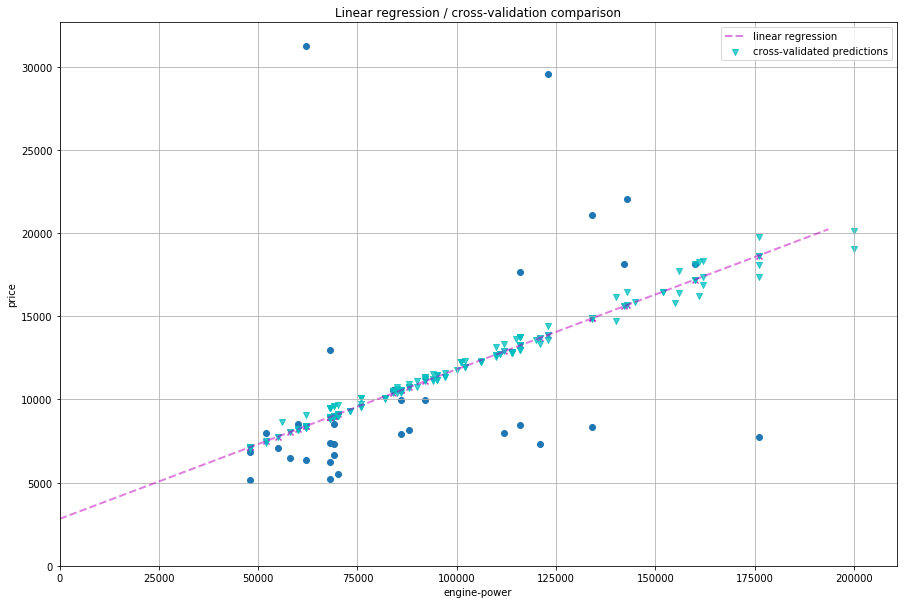

 - coefficient of determination : +0.1730
 - mean root squared error      : +6114.4521


In [14]:
from sklearn.model_selection import cross_val_predict

linreg_val = LinearRegression()

# use the original full dataset, don't use the split as k_fold performs that operation
y_cval = cross_val_predict(linreg_val, 
                           engine_power_values, 
                           price_values, 
                           cv=k_fold)

fig, ax = plt.subplots(figsize=(15,10))

x = np.arange(X_test.max() * 1.1).reshape(-1, 1)

# scatter test data
ax.scatter(X_test, y_test)

# plot linear regression line
ax.plot(x, linreg.predict(x), 
        color='m', alpha=0.5, linestyle='dashed', lw=2, label="linear regression")
# scatter linear regression prediction
ax.scatter(X_test, linreg.predict(X_test), 
           color='m', 
           marker='x', 
           alpha=0.75)

# scatter cross-validated predictions
ax.scatter(engine_power_values, y_cval, 
           color='c', 
           marker='v', 
           alpha=0.75,
           label="cross-validated predictions")

ax.set_xlabel('engine-power'), ax.set_ylabel('price')
plt.title("Linear regression / cross-validation comparison")

plt.xlim(0), plt.ylim(0)

plt.grid(), plt.legend()

plt.show()

print(" - coefficient of determination : {:+.4f}".format(r2_score(price_values, y_cval)))
print(" - mean root squared error      : {:+.4f}".format(np.sqrt(mean_squared_error(price_values, y_cval))))


- the cross-validated model fits the data better, since the following occurs:
 - the coefficient of determination is slightly better due to more variation in the training data
 - the root mean squared error is slightly better, too, due to the same as above

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [15]:
# (1) # Your Code goes here:

In [16]:
# (2) Show any working code here...
# Your Code goes here:

(2) - Final Conclusion(s)
***Your answer goes here:***

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

In [17]:
X_auto_numeric, y_auto_numeric = auto_numeric.drop("price", axis=1), auto_numeric["price"]

mv_linreg = LinearRegression()

mv_preds_cv = cross_val_predict(mv_linreg, X_auto_numeric, y_auto_numeric, cv=k_fold)

print("Multi-variate Linear Regression model (KFold) :")
print(" - coefficient of determination : {:+.4f}".format(r2_score(y_auto_numeric, mv_preds_cv)))
print(" - mean root squared error      : {:+.4f}".format(np.sqrt(mean_squared_error(y_auto_numeric, mv_preds_cv))))

Multi-variate Linear Regression model (KFold) :
 - coefficient of determination : +0.4861
 - mean root squared error      : +4819.8046


- determination far better, error also lower
- the model follows general trend more accurately now that the other variables are taken into account

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` (plot below)
1. [Text] Why might this cause a problem for linear regression? 

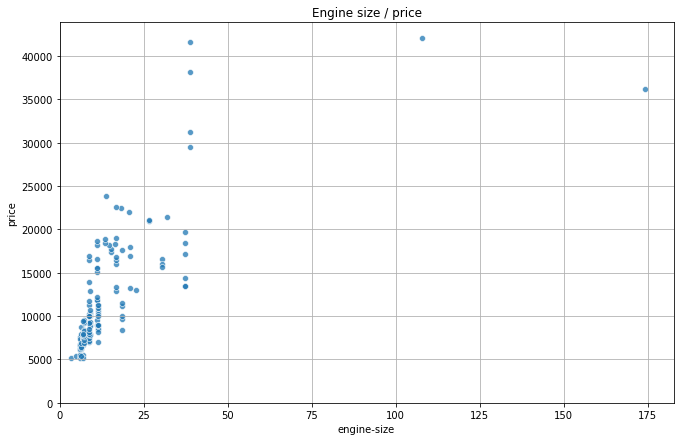

In [18]:
fig, ax = plt.subplots(figsize=(11,7))

sns.scatterplot(auto_numeric['engine-size'], auto_numeric['price'], alpha=0.75)

ax.grid()

plt.title("Engine size / price")

plt.xlim(0)
plt.ylim(0)
plt.show()

- outliers skew the distribution
- no apparent direct correlation between the two other than nearer the origin

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a (Multi-variate) LinearRegression Model (on all the attributes including the transformed `engine-size`) and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

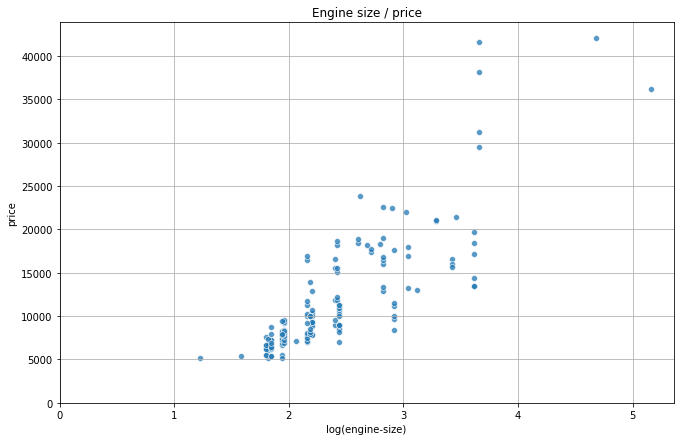

In [19]:
X_auto_numeric_ln = X_auto_numeric.copy()

# apply log function to engine-size data
X_auto_numeric_ln["engine-size"] = X_auto_numeric_ln["engine-size"].apply(np.log)

fig, ax = plt.subplots(figsize=(11,7))

sns.scatterplot(X_auto_numeric_ln["engine-size"], auto_numeric['price'], alpha=0.75)

plt.title("Engine size / price")
plt.xlabel("log(engine-size)")

plt.grid()

plt.xlim(0)
plt.ylim(0)

plt.show()

In [20]:
mv_linreg_ln = LinearRegression()

mv_preds_cv_ln = cross_val_predict(mv_linreg, X_auto_numeric_ln, y_auto_numeric, cv=k_fold)

print("Multi-variate Linear Regression model (KFold + log(engine-size)) :")
print(" - coefficient of determination : {:+.4f}".format(r2_score(y_auto_numeric, mv_preds_cv_ln)))
print(" - mean root squared error      : {:+.4f}".format(np.sqrt(mean_squared_error(y_auto_numeric, mv_preds_cv_ln))))

Multi-variate Linear Regression model (KFold + log(engine-size)) :
 - coefficient of determination : +0.6896
 - mean root squared error      : +3745.9196


- the performance of the model has improved dramatically
- this improvement is due to how the log transformation brings the points closer to a linear relationship
 - `price` and `engine-size` must have a non-linear correlation 

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

In [21]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) ***Your answer goes here:***

In [22]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***